In [44]:
using LinearAlgebra, Statistics, QuadGK
using Distributions, NLsolve, Roots, Random, Plots, Optim, Parameters, Expectations, Interpolations

In [95]:
l = 2000

2000

In [96]:
# pdf

function output_pdf(γ)
    
    x = range(0,2*γ,length=l)
    mho, r = (γ, γ)
    dist = SymTriangularDist(mho, r)
    p = pdf(dist, x)
    
    return p
      
end

output_pdf (generic function with 1 method)

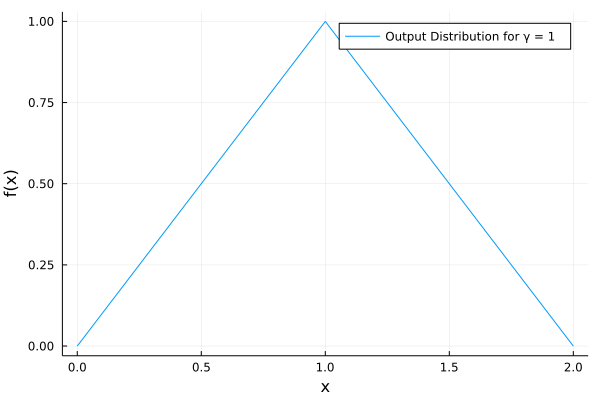

In [97]:
x = range(0,2,length=l)
w = output_pdf(1)
plot(x,w, xlabel = "x", ylabel = "f(x)", label = "Output Distribution for γ = 1 ")

In [98]:
function output_cdf(γ)
    
    x = range(0,2*γ,length=l)
    mho, r = (γ, γ)
    dist = SymTriangularDist(mho, r)
    p = cdf(dist, x)
    
    return p
      
end

output_cdf (generic function with 1 method)

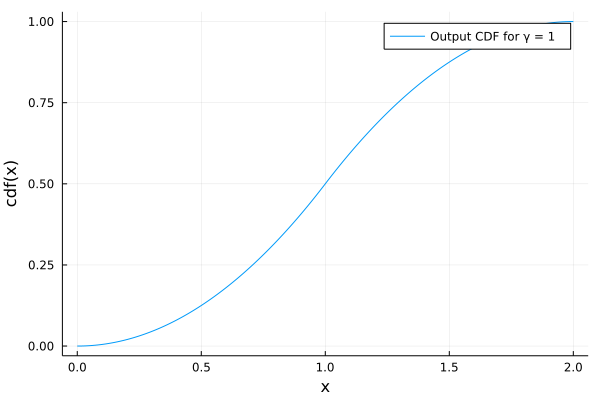

In [99]:
x = range(0,2,length=l)
w = output_cdf(1)
plot(x,w, xlabel = "x", ylabel = "cdf(x)", label = "Output CDF for γ = 1 ")

In [135]:
function Rd(D, γ, c)
    if D<=2γ
        
        # pr(x>D) = 1 - CDF(D)
        
        grid(γ) = range(0,2*γ,length=l)
        cdfd(γ) = LinearInterpolation(grid(γ),output_cdf(γ),extrapolation_bc=Line()) 
        pdfd(γ) = LinearInterpolation(grid(γ),output_pdf(γ),extrapolation_bc=Line()) 
        
        
        R = D * (1-cdfd(γ).(D)) + quadgk(x -> (x-c) * pdfd(γ).(x), 0, D, rtol=1e-8)[1]
        
    else
        
        R = γ-c
        
    end
    
    return R
end

Rd (generic function with 1 method)

In [132]:
a = Rd(1,1,0.5)

0.5833333333333333

In [136]:
# Equallibrium

function EQ(γ, c, W, r) 
    
    difference(d) = Rd(d, γ, c) - (1-W) * (1+r)
    eq = find_zero(difference, 0)
    
    return eq
    
end

EQ (generic function with 2 methods)

In [138]:
d1 = EQ(1, 0.1, 0.3, 0.05)

0.8940940749354434

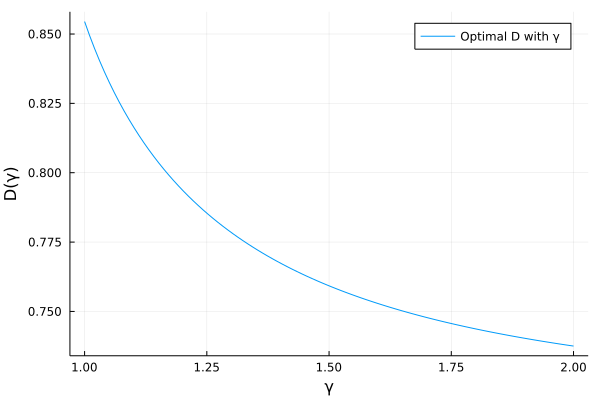

In [140]:
# γ change
γ1 = range(1,2,length=100)
EQγ(γ) = EQ(γ, 0.1, 0.3, 0.02)

plot(γ1, EQγ, xlabel = "γ", ylabel = "D(γ)", label = "Optimal D with γ")

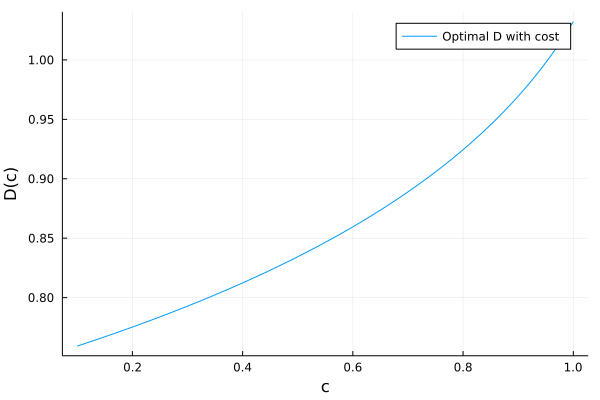

In [148]:
# c change
c1 = range(0.1,1,length=100)
EQc(c) = EQ(1.5, c, 0.3, 0.02)

plot(c1, EQc, xlabel = "c", ylabel = "D(c)", label = "Optimal D with cost")

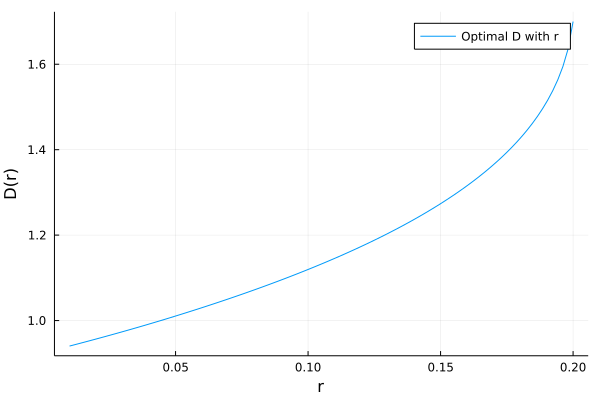

In [159]:
# r change
r1 = range(0.01,0.2,length=100)
EQr(r) = EQ(1, 0.1, 0.25, r)

plot(r1, EQr, xlabel = "r", ylabel = "D(r)", label = "Optimal D with r")

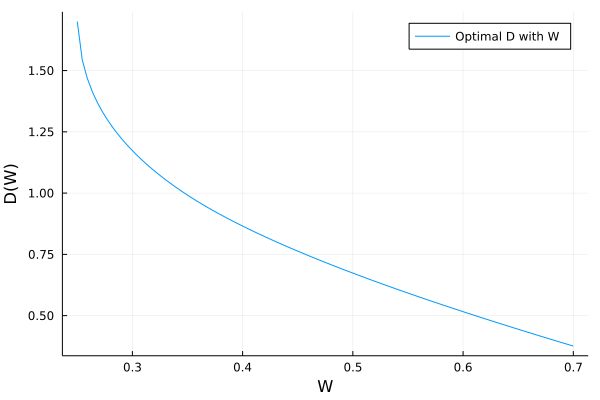

In [170]:
# W change
W1 = range(0.25,0.7,length=100)
EQW(W) = EQ(1, 0.1, W, 0.2)

plot(W1, EQW, xlabel = "W", ylabel = "D(W)", label = "Optimal D with W")

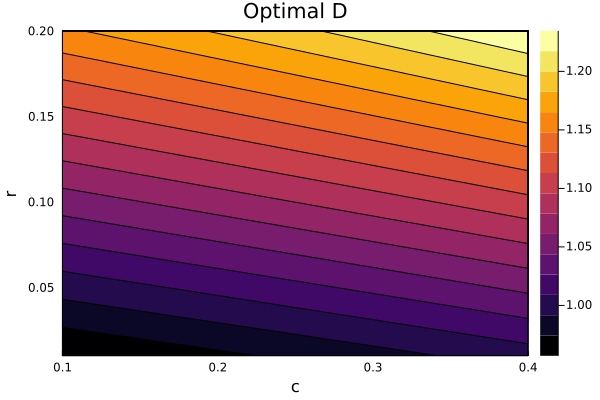

In [198]:
c2 = range(0.1,0.4,length=20)
r2 = range(0.01,0.2,length=20)
EQrc(c,r) = EQ(2, c, 0.1, r)
contour(c2, r2, EQrc,
        title = "Optimal D",
        xlabel = "c",
        ylabel = "r",
        fill = true)